<a href="https://colab.research.google.com/github/AftabUdaipurwala/PythonBasics/blob/main/Python_Pandas_Tutorial_10_Pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Section

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/pandas/10_pivot/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
pandas_pivot.ipynb  weather2.csv  weather3.csv	weather.csv


# Data Section

In [7]:
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/10_pivot/weather.csv')
df.head()

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83


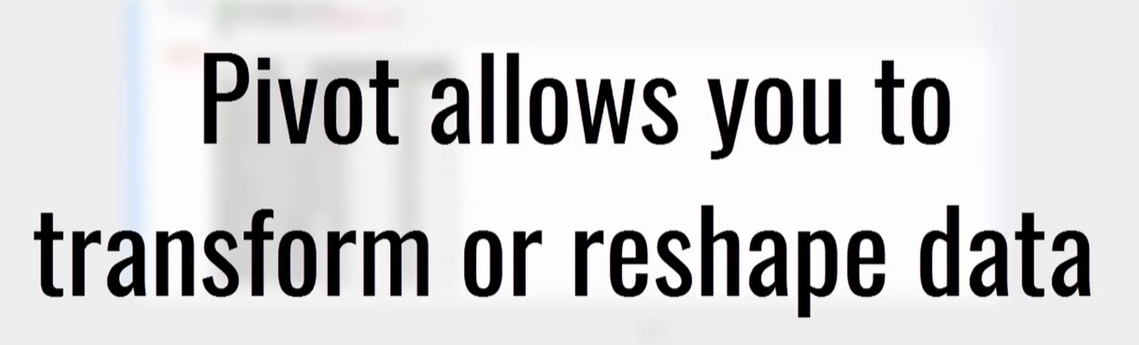

In [8]:
# trying pivot function basic functionality with mandatory parameters
df.pivot(index='date', columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [9]:
df.pivot(index='date', columns='city', values='humidity') # we can select which value we want pivot on , from mulitple columns that we have, we can also provide list of the columns

city,beijing,mumbai,new york
date,,,
5/1/2017,26,80,56
5/2/2017,30,83,58
5/3/2017,35,85,60


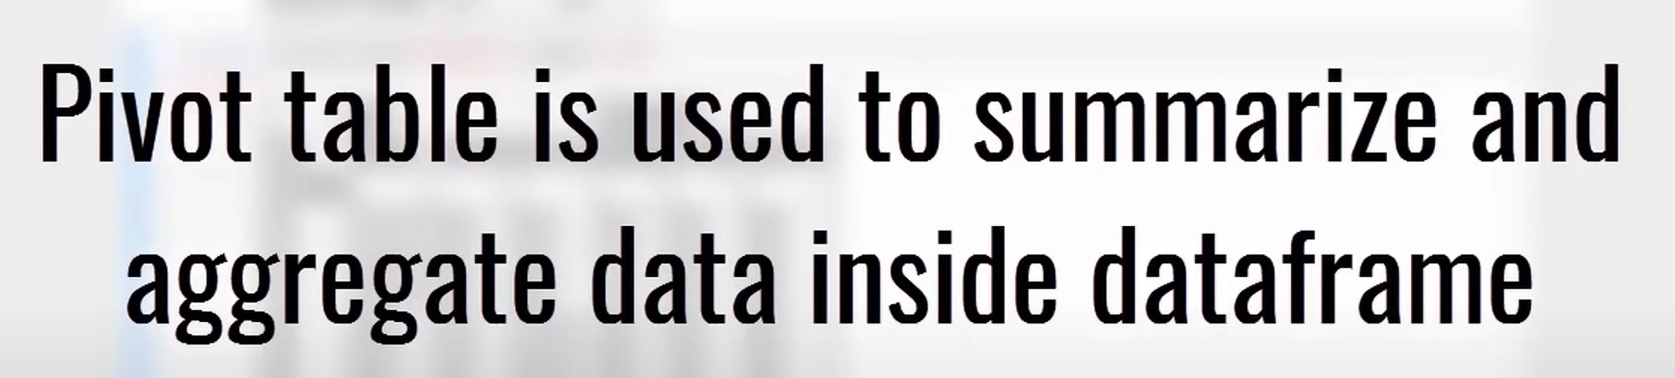

In [10]:
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/10_pivot/weather2.csv')
df # same date has 2 values of temperature n humidity

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [11]:
df.pivot_table(index='city', columns = 'date', aggfunc='sum') # default agg funciton is mean, u can use anything from numpy aggregations

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai        163      111         153      162
new york      110      122         126      142

In [12]:
df.pivot_table(index='city', columns = 'date', aggfunc='sum', margins=True) # margins provide all column which is total of the row and columns

humidity               temperature              
date     5/1/2017 5/2/2017  All    5/1/2017 5/2/2017  All
city                                                     
mumbai        163      111  274         153      162  315
new york      110      122  232         126      142  268
All           273      233  506         279      304  583

In [14]:
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/10_pivot/weather3.csv', parse_dates=['date'])
df # to work on the grouper function, only one city,but different dates

,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-02,new york,61,54
2,2017-05-03,new york,70,60
3,2017-12-01,new york,30,50
4,2017-12-02,new york,28,52
5,2017-12-03,new york,25,51


In [16]:
df.pivot_table(index=pd.Grouper(freq='M', key='date'), columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667
